# Деревья решений
## Цель работы
Научиться применять модель дерева принятия решений для задач классификации и регрессии.

## Содержание работы
1. Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.
2. Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.
3. Визуализируйте соответствующий граф дерева решений.
4. Визуализируйте полученные разделяющие области.
5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
6. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.
7. Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.
8. Визуализируйте соответствующий граф дерева решений.
9. Визуализируйте получившуюся кусочную линию регрессии.
10. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
RANDOM_SEED = np.random.RandomState(0)

Text(0, 0.5, 'X2')

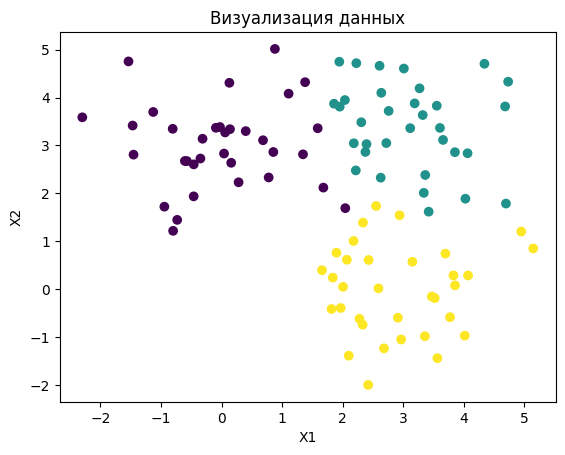

In [4]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

### 2. Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       random_state=RandomState(MT19937) at 0x27D8EA44240)

### 3. Визуализируйте соответствующий граф дерева решений.

In [7]:
from sklearn.tree import plot_tree

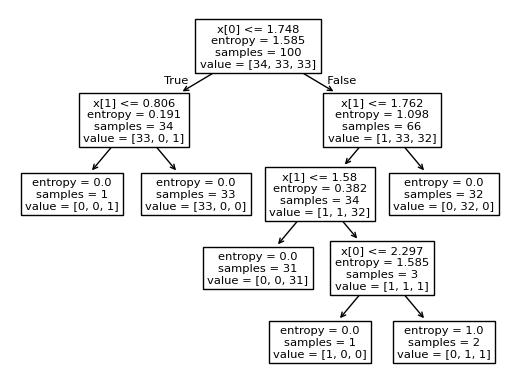

In [8]:
plot_tree(clf_tree) 
plt.show()

### 4. Визуализируйте полученные разделяющие области.

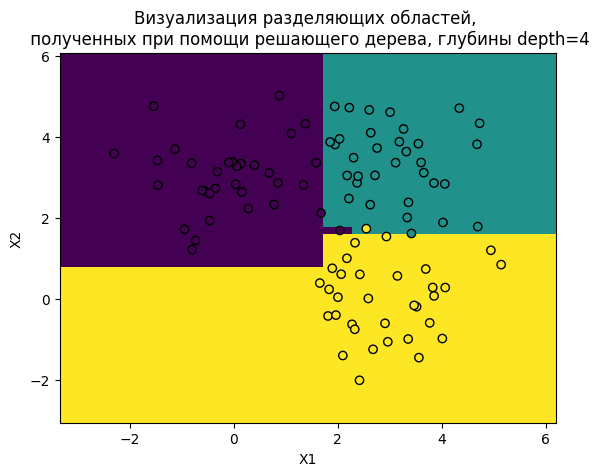

In [9]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [11]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [12]:
observation_new = [[2, 1]]

In [13]:
clf_tree.predict(observation_new)

array([2])

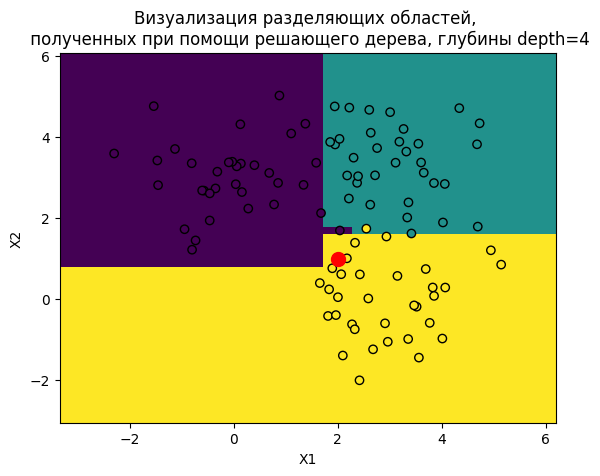

In [14]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black')
plt.scatter(observation_new[0][0], observation_new[0][1], c='r', s=100)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 6. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.

In [15]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

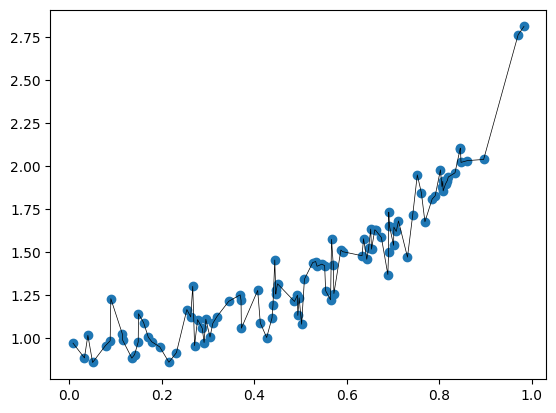

In [16]:
plt.scatter(X, y)
plt.plot(X, y, c='black', linewidth=0.5)

### 7. Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3,
                      random_state=RandomState(MT19937) at 0x27D8EA44240)

### 8. Визуализируйте соответствующий граф дерева решений.

[Text(0.5, 0.875, 'x[0] <= 0.58\nsquared_error = 0.156\nsamples = 100\nvalue = 1.408'),
 Text(0.25, 0.625, 'x[0] <= 0.439\nsquared_error = 0.031\nsamples = 59\nvalue = 1.144'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 0.243\nsquared_error = 0.014\nsamples = 38\nvalue = 1.048'),
 Text(0.0625, 0.125, 'squared_error = 0.009\nsamples = 19\nvalue = 0.979'),
 Text(0.1875, 0.125, 'squared_error = 0.01\nsamples = 19\nvalue = 1.118'),
 Text(0.375, 0.375, 'x[0] <= 0.505\nsquared_error = 0.015\nsamples = 21\nvalue = 1.317'),
 Text(0.3125, 0.125, 'squared_error = 0.009\nsamples = 10\nvalue = 1.241'),
 Text(0.4375, 0.125, 'squared_error = 0.01\nsamples = 11\nvalue = 1.386'),
 Text(0.75, 0.625, 'x[0] <= 0.934\nsquared_error = 0.091\nsamples = 41\nvalue = 1.788'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 0.748\nsquared_error = 0.042\nsamples = 39\nvalue = 1.737'),
 Text(0.5625, 0.125, 'squared_error = 0.008\nsamples = 21\nvalue = 1.571'),
 Text(0.6875, 0.125, 'squ

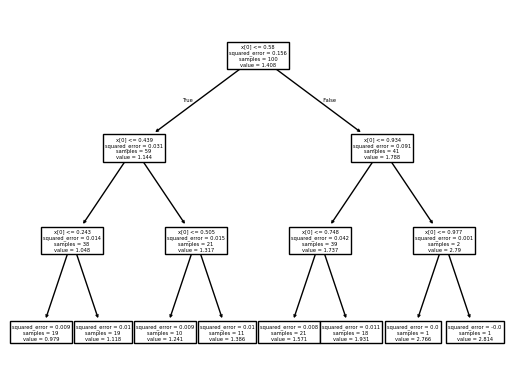

In [19]:
plot_tree(reg_tree)

### 9. Визуализируйте получившуюся кусочную линию регрессии.

Text(0, 0.5, 'y')

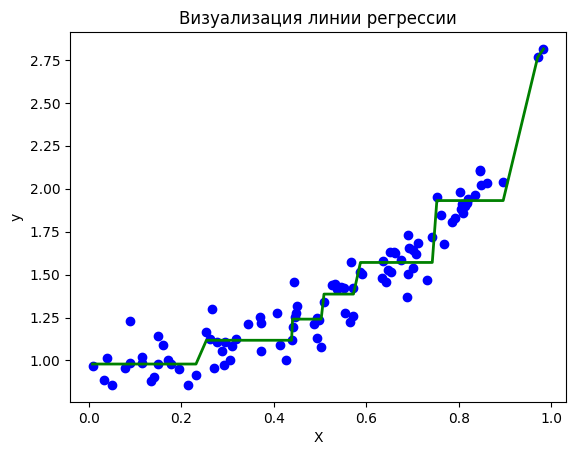

In [20]:
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

### 10. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9410032718858636
MSE=  0.009204467610873804


In [ ]:
observation_new = [[0.7]]

Text(0, 0.5, 'y')

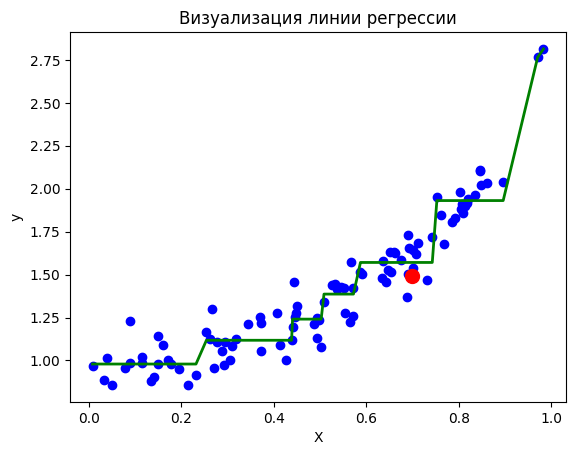

In [26]:
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)
plt.scatter(observation_new[0][0], observation_new[0][1], c='r', s=100)


plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')